# Assignment

1. Write digit 0-9 on paper.
2. Take photograph of each digit.
3. Load each digit as shape (20,20) in gray
4. Using the k=4 with the highest accuracy. (Train:Test = 2:1)
5. Test your images and compare the predictions.

In [1]:
def BGR2RGB(img):
    return img[:,:,::-1]

def BGR2GRAY(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img

def GRAY2RGB(img):
    img = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
    return img


In [5]:
import glob
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

images = [cv.imread(file) for file in glob.glob("digits-ori/*.jpg")]


Original image shape: (420, 420, 3)


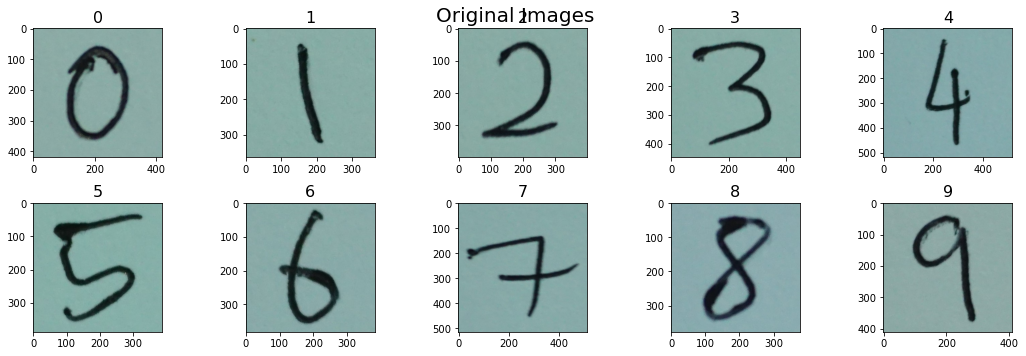

In [6]:
a, b = 2,5
plt.figure(figsize=(15,5))

print('\nOriginal image shape:', images[0].shape)

for i in range(len(images)):
    plt.subplot(a,b,i+1)
    plt.imshow(BGR2RGB(images[i]))
    plt.suptitle('Original Images', fontsize=20)
    plt.title(f'{i}', fontsize=16)
    
plt.tight_layout()
plt.show()

In [7]:
img = np.array(images, dtype=object)

width, height = 20, 20
dim = (width, height)
digits_ls = []

for i in range(len(img)):
    digit = cv.resize(img[i], dim, interpolation=cv.INTER_AREA)
    digits_ls.append(digit)



Resized image shape: (20, 20, 3)


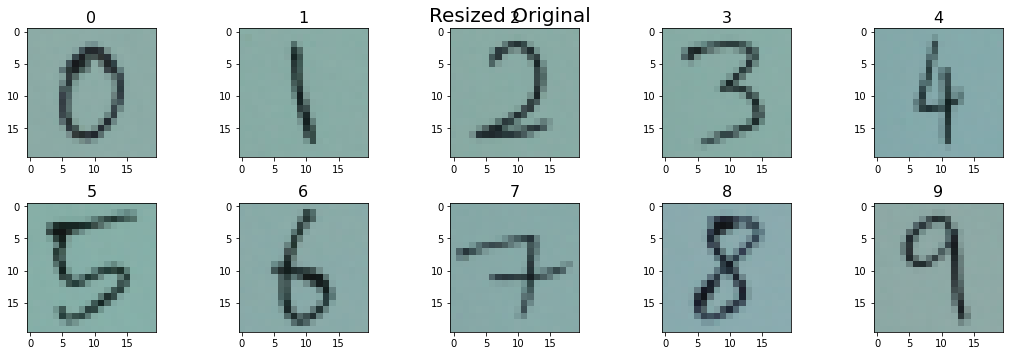

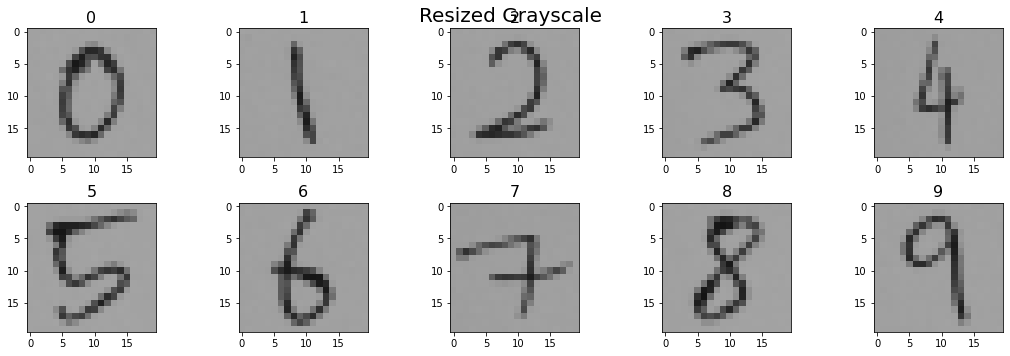

In [8]:
print('\nResized image shape:', digits_ls[0].shape)

a, b = 2,5
plt.figure(figsize=(15,5))

for i in range(len(digits_ls)):
    plt.subplot(a,b,i+1)
    plt.imshow(BGR2RGB(digits_ls[i]))
    plt.suptitle('Resized Original', fontsize=20)
    plt.title(f'{i}', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5))

for i in range(len(digits_ls)):
    plt.subplot(a,b,i+1)
    plt.imshow(GRAY2RGB(BGR2GRAY(digits_ls[i])))
    plt.suptitle('Resized Grayscale', fontsize=20)
    plt.title(f'{i}', fontsize=16)
plt.tight_layout()
plt.show()


Thresholded image shape: (20, 20, 3)


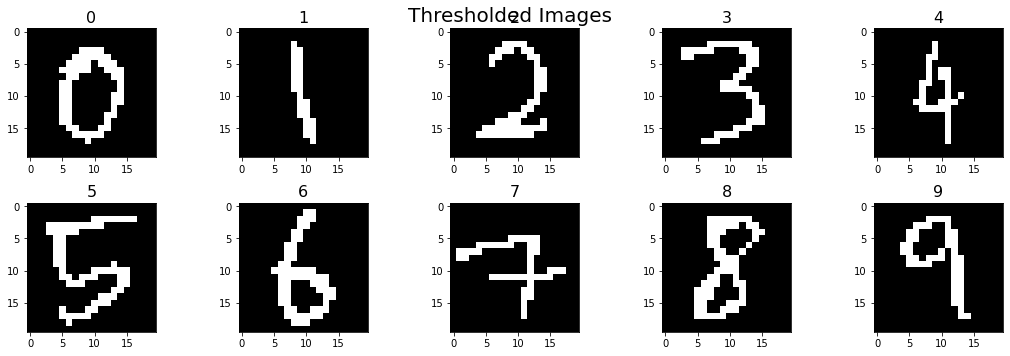

In [9]:
imgThresh_ls = []

for i in range(len(digits_ls)):
    imgGray = BGR2GRAY(digits_ls[i])
    ret, imgThresh = cv.threshold(imgGray, 125, 255, cv.THRESH_BINARY_INV)
    imgThresh_ls.append(GRAY2RGB(imgThresh))


print('\nThresholded image shape:', imgThresh_ls[0].shape)
a, b = 2,5
plt.figure(figsize=(15,5))
for i in range(len(imgThresh_ls)):
    plt.subplot(a,b,i+1)
    plt.imshow(imgThresh_ls[i])
    plt.suptitle('Thresholded Images', fontsize=20)
    plt.title(f'{i}', fontsize=16)

plt.tight_layout()
plt.show()
    

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

filename = "../../samples/data/digits.png"
imgGray = cv.imread(filename, cv.IMREAD_GRAYSCALE)

print(imgGray.shape)

#### get all the digits
IMG_SIZE = 20

rowNum = imgGray.shape[0] / IMG_SIZE
colNum = imgGray.shape[1] / IMG_SIZE

rows = np.vsplit(imgGray, rowNum)

digits = []
for row in rows:
    rowCells = np.hsplit(row, colNum)
    for digit in rowCells:
        digits.append(digit)

# convert list to np.array
digits = np.array(digits)
print("digits", digits.shape)

# labels
DIGITS_CLASS = 10
repeatNum = len(digits) / DIGITS_CLASS
labels = np.repeat(np.arange(DIGITS_CLASS), repeatNum)
print("labels", labels.shape)

#### get features
features = []
for digit in digits:
    img_pixel = np.float32(digit.flatten())
    features.append(img_pixel)

features = np.squeeze(features)
print("features", features.shape)

# shuffle features and labels
# seed random for constant random value
rand = np.random.RandomState(321)
shuffle = rand.permutation(features.shape[0])
features, labels = features[shuffle], labels[shuffle]

# split into training and testing
splitRatio = [2, 1]
sumRatio = sum(splitRatio)
partition = np.array(splitRatio) * len(features) // sumRatio
partition = np.cumsum(partition)

featureTrain, featureTest = np.array_split(features, partition[:-1])
labelTrain, labelTest = np.array_split(labels, partition[:-1])

print("featureTrain", featureTrain.shape)
print("featureTest", featureTest.shape)
print("labelTrain", labelTrain.shape)
print("labelTest", labelTest.shape)

# Train the KNN model:
print("Training KNN model")
knn = cv.ml.KNearest_create()
knn.train(featureTrain, cv.ml.ROW_SAMPLE, labelTrain)

# Test the created model:
k=4
ret, prediction, neighbours, dist = knn.findNearest(featureTest, k)

# Compute the accuracy:
accuracy = (np.squeeze(prediction) == labelTest).mean() * 100
print("Accuracy k = {}: {}".format(k, accuracy))

(1000, 2000)
digits (5000, 20, 20)
labels (5000,)
features (5000, 400)
featureTrain (3333, 400)
featureTest (1667, 400)
labelTrain (3333,)
labelTest (1667,)
Training KNN model
Accuracy k = 4: 93.94121175764847


In [13]:
# Convert the thresholded image into array 

for i in range(len(imgThresh_ls)):
    imgThresh_ls[i] = np.float32(imgThresh_ls[i])
    
imgThreshArr = np.array(imgThresh_ls, np.float32)
imgThreshArr = imgThreshArr.reshape((-1,20,20))
print('Digits shape:', digits.shape)
print('My images shape:', imgThreshArr.shape)

Digits shape: (5000, 20, 20)
My images shape: (30, 20, 20)


In [14]:
# zeroz = imgThresh_ls[0]
# zeroz = imgThreshArr[0]
# plt.imshow(zeroz)

In [15]:
# Testing KNN Model
print('Testing New Images\n')

# New Test Label
DIGITS_CLASS = 10
repeatNum = len(imgThreshArr) / DIGITS_CLASS
labels = np.repeat(np.arange(DIGITS_CLASS), repeatNum)
# print("Test labels", labels.shape)

# New Test Features
features = []
for digit in imgThreshArr:
    img_pixel = np.float32(digit.flatten())
    features.append(img_pixel)

features = np.squeeze(features)


print("Original featureTest", featureTest.shape)
print("Original labelTest", labelTest.shape)
print("New featureTest", features.shape)
print("New labelTest", labels.shape)


ret, prediction, neighbours, dist = knn.findNearest(features, k)

accuracy = (np.squeeze(prediction) == labels).mean() * 100
print("\nk = {}: Accuracy {:.2f} %".format(k, accuracy))

Testing New Images

Original featureTest (1667, 400)
Original labelTest (1667,)
New featureTest (30, 400)
New labelTest (30,)

k = 4: Accuracy 20.00 %


In [16]:
# match = np.squeeze(prediction) == labels
# correct = np.count_nonzero(match)
# acc = correct * 100.0 / prediction.size
# print(acc)

In [17]:
# print('featureTest[1]:', featureTest[1].shape)
# print('featureTest:',featureTest.shape)

# zeroz = zeroz.flatten()
# print('Zeroz:',zeroz.shape)

# imgBW = np.array(imgThresh_ls, dtype=np.float32)

# print('imgBW:',imgBW.shape)

# for i in range(len(imgBW)):
#     imgBW[i] = np.float32(imgBW[i])
    
# imgBWTest = imgBW.reshape((-1,400))
# print('imgBWTest:',imgBWTest.shape)
# print('featureTest:',featureTest.shape)
# featureTest
# # plt.imshow(imgBW)